# Flight Delay prediction challenge 

The aim of this EDA is to get an idea about how the delays are distributed among the different seasons of the year (do we have more delays in summer/winter?) and if the delays cluster at a certain time of the day. 
The data was downloaded from zingi (https://zindi.africa/competitions/ai-tunisia-hack-5-predictive-analytics-challenge-2). 
The columns contain the following information: 

- DATOP - Date of flight
- FLTID - Flight number
- DEPSTN - Departure point
- ARRSTN - Arrival point
- STD - Scheduled Time departure
- STA - Scheduled Time arrival
- STATUS - Flight status
- target - flight delay in minutes 

## 1. Investigation of the dataset 

In [1]:
#import all required libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
from numpy import mean

In [2]:
# Import the training data set 
df = pd.read_csv('data/train.csv')

In [3]:
#Investigate the data set 
df.head(5)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [4]:
#Analyze the shape of the dataset 
df.shape

(107833, 10)

In [5]:
#Find out in which time periods the data has been collected 
print(df.STD.min())
print(df.STD.max())

#So the time period is from 01.01.2016 to 31.12.2018 

2016-01-01 00:15:00
2018-12-31 23:10:00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [7]:
#Try to understand what the flight status stands for
df.groupby('STATUS').nunique()

#Grouping it by status and checking for unique values does not really clarify what exactly every status means and if it is important 

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,AC,target
STATUS,,,,,,,,,
ATA,93679,1011,1782,129,125,73283,76274,61,964
DEL,151,78,38,17,14,151,150,5,1
DEP,467,310,33,9,16,467,467,5,74
RTR,294,253,135,38,38,289,289,33,100
SCH,13242,1011,132,59,59,11491,11724,41,1


In [8]:
print(df.target.min())
print(df.target.max())

0.0
3451.0


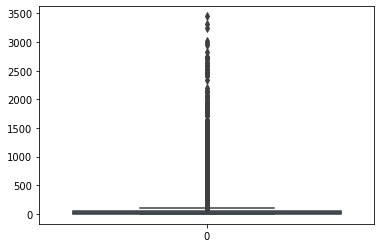

In [9]:
#Boxplot to analyze the distribution of the target column 
df.query('target == 0')
sns.boxplot(data=df.target);

In [10]:
df.query('target == 0').target.count()

#we have many flights that arrived in time. 
percentage_in_time = (38168/107833)*100
print(percentage_in_time)

35.39547262897258


In [11]:
# changing times into Time format
df['DATOP'] = pd.to_datetime(df['DATOP'])
df['STD'] = pd.to_datetime(df['STD'])
df['STA'] = df['STA'].str.replace('.', ':')
df['STA'] = pd.to_datetime(df['STA'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ID      107833 non-null  object        
 1   DATOP   107833 non-null  datetime64[ns]
 2   FLTID   107833 non-null  object        
 3   DEPSTN  107833 non-null  object        
 4   ARRSTN  107833 non-null  object        
 5   STD     107833 non-null  datetime64[ns]
 6   STA     107833 non-null  datetime64[ns]
 7   STATUS  107833 non-null  object        
 8   AC      107833 non-null  object        
 9   target  107833 non-null  float64       
dtypes: datetime64[ns](3), float64(1), object(6)
memory usage: 8.2+ MB


/var/folders/v3/9m4l768x37nbr7_d_v6t2fhm0000gn/T/ipykernel_79384/3768464511.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['STA'] = df['STA'].str.replace('.', ':')


## 2. Visualization of flights per year and flight delay over the year and month 

In [12]:
# Plot1: see how big the delay at different time points of the year is
# Create a new columns containing year and month of the flight (from DATOP)

df['Year'] = df.DATOP.dt.year
df['Month'] = df.DATOP.dt.month
df.head(2)


,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,Year,Month
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,2016,1
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,2016,1


In [13]:
#Want to have a plot where we see the number of flights per month and year 
df_id = df.groupby(['Month', 'Year']).FLTID.count().reset_index()
#df_id_pivot = df_id.pivot('DATOP_month', 'DATOP_year', 'FLTID')
#df_id_pivot


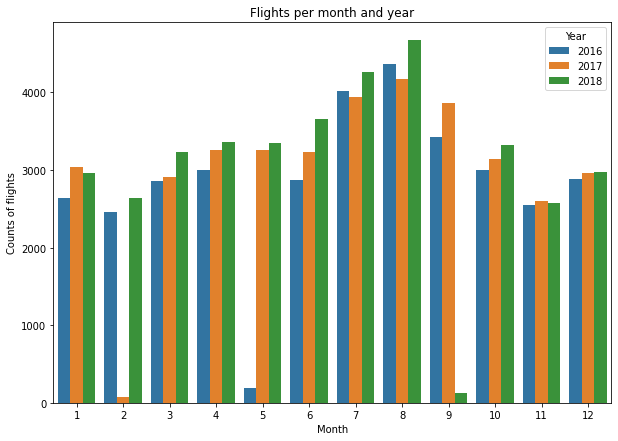

In [14]:
#Plot counts of flight per Month and year 
plt.figure(figsize=(10,7))
sns.barplot(data=df_id, x='Month', y='FLTID', hue='Year').set(title='Flights per month and year', xlabel='Month', ylabel='Counts of flights');

Year        2016       2017       2018
Month                                 
1      38.509848  39.524154  32.137301
2      16.774246  14.866667  27.171602
3      33.430269  47.997934  67.965934
4      19.324550  73.073268  60.236537
5      26.957895  54.015683  57.793660
6      18.912726  43.863327  63.332512
7      45.777750  70.393663  57.440769
8      41.590483  59.224622  89.365525
9      45.608987  74.168999  45.492424
10     29.295864  30.588628  46.659337
11     17.229502  37.825702  46.589216
12     42.761246  45.753124  69.996298


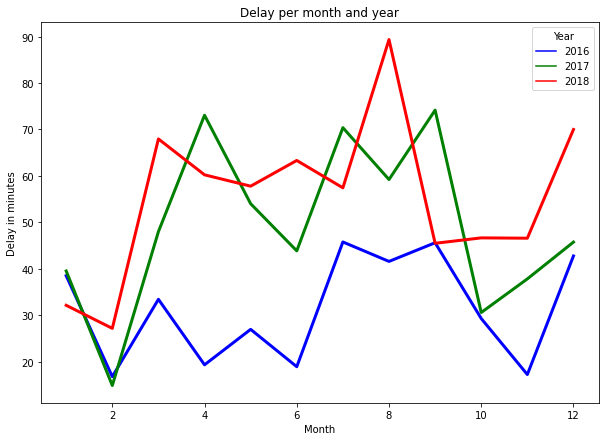

In [15]:
#For the visualization group the dates of flight per year and month (create 3 subplots, one for each year)
#create pivot table
df_months = df.groupby(['Month', 'Year']).mean().reset_index()
df_months
df_months_pivot= df_months.pivot('Month', 'Year', 'target')
print(df_months_pivot)
plt.figure(figsize=(10,7))
sns.lineplot(data=df_months_pivot, linewidth=3, palette=['b', 'g', 'r'],dashes=False).set(title='Delay per month and year', xlabel='Month', ylabel='Delay in minutes');


In [16]:
# For the next plot we are interested in how the delay is distributed over the day 
#create a new column containing the time of departure

df['STD_time'] = df.STD.dt.time
df.head(2)



,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,Year,Month,STD_time
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,2016,1,10:30:00
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,2016,1,15:05:00


In [17]:
df_time = df[['STD_time', 'target']].groupby('STD_time').mean().round().reset_index()
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STD_time  526 non-null    object 
 1   target    526 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.3+ KB


In [18]:
#Convert STD_time column to timedelta 
time = pd.to_timedelta(pd.to_datetime(df['STD']).dt.time.astype(str))
time

0        0 days 10:30:00
1        0 days 15:05:00
2        0 days 04:10:00
3        0 days 14:10:00
4        0 days 14:30:00
               ...      
107828   0 days 23:00:00
107829   0 days 08:00:00
107830   0 days 05:00:00
107831   0 days 18:00:00
107832   0 days 06:15:00
Name: STD, Length: 107833, dtype: timedelta64[ns]

In [19]:
#create new categories in such a way that early flights are considered as departing between midnight and 10 am and everything afterwards as late 
# # define bins and labels
bins = ['00:00:00', '06:00:00', '11:00:00', '17:00:00', '23:59:59']
labels = ['Early_Morning', 'Morning', 'Mid-Day', 'Late']

#convert to timedelta 
categories = pd.cut(time, bins=pd.to_timedelta(bins), labels=labels, ordered=False)
categories

0               Morning
1               Mid-Day
2         Early_Morning
3               Mid-Day
4               Mid-Day
              ...      
107828             Late
107829          Morning
107830    Early_Morning
107831             Late
107832          Morning
Name: STD, Length: 107833, dtype: category
Categories (4, object): ['Early_Morning', 'Morning', 'Mid-Day', 'Late']

In [20]:
df['STD_time_category'] = categories
df.head(2)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,Year,Month,STD_time,STD_time_category
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,2016,1,10:30:00,Morning
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,2016,1,15:05:00,Mid-Day


In [21]:
#Check the number of flights for the two categories, normalize to the number of flights 
df.STD_time_category

0               Morning
1               Mid-Day
2         Early_Morning
3               Mid-Day
4               Mid-Day
              ...      
107828             Late
107829          Morning
107830    Early_Morning
107831             Late
107832          Morning
Name: STD_time_category, Length: 107833, dtype: category
Categories (4, object): ['Early_Morning', 'Morning', 'Mid-Day', 'Late']

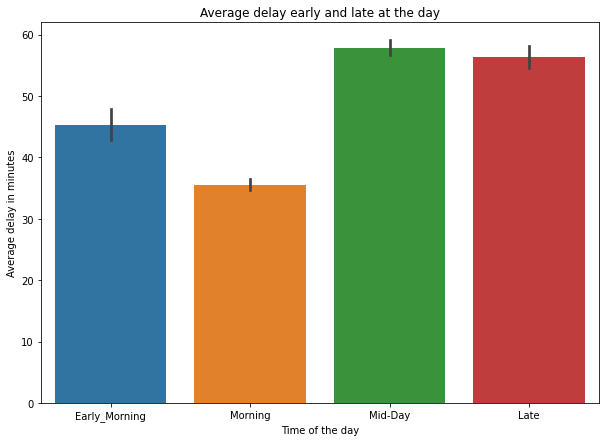

In [22]:
#Create a plot showing the average delay (or if 0 without delay) for early and late flights 
plt.figure(figsize=(10,7))
sns.barplot(data=df, x='STD_time_category', y='target', estimator=mean).set(title='Average delay early and late at the day', xlabel='Time of the day', ylabel='Average delay in minutes');

In [23]:
#Want to normalize our data for the weight of the flight number (=number of flights per category/ total number of flights)
df2 = df.groupby('STD_time_category').FLTID.count().reset_index()
print(df2)

df3 = df.groupby('STD_time_category').target.mean().reset_index()
print(df3)

#what is the total number of flights? 
print(df2.FLTID.sum())

#calculate the weight per category 
early = 9396/107678
morning = 37024/107678
mid = 39442/107678
late = 21816/107678

#built a new list with the four weights 
weight =[early, morning, mid, late]
print(weight)

#add the list as new column to our df3 dataframe
df3['weight']= weight
df3

#create a new column for the normalization 
df3 = df3.eval('normalized = target * weight')


  STD_time_category  FLTID
0     Early_Morning   9396
1           Morning  37024
2           Mid-Day  39442
3              Late  21816
  STD_time_category     target
0     Early_Morning  45.316092
1           Morning  35.555153
2           Mid-Day  57.834643
3              Late  56.418133
107678
[0.08726016456472074, 0.3438399673099426, 0.36629580787161725, 0.2026040602537194]


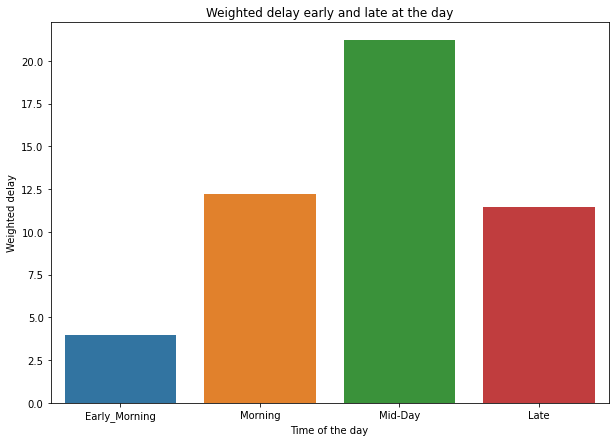

In [24]:
#Create a plot with the normalized data 
plt.figure(figsize=(10,7))
sns.barplot(data=df3, x='STD_time_category', y='normalized').set(title='Weighted delay early and late at the day', xlabel='Time of the day', ylabel='Weighted delay');

In [25]:
#Check the average delay per flight ID 
count_target = df.groupby('FLTID').target.count().reset_index()
count_target
fltid = df.groupby('FLTID').target.mean().reset_index()
fltid['count'] = count_target.target
fltid
fltid.sort_values(by='target', ascending=False).head(10)


,FLTID,target,count
946,TU 3521,2501.0,2
945,TU 3520,2345.0,1
305,TU 1714,2120.0,1
304,TU 1713,2078.0,1
323,TU 2171,1955.0,1
971,TU 3745,1855.0,1
232,TU 0713A,1821.0,1
234,TU 0714A,1800.0,1
834,TU 3283,1765.0,1
483,TU 2723,1710.0,1


In [26]:
fltid.sort_values(by='count', ascending=False).head(10)

#The flight who occurs most often and had less delay starts at Waikoloa Heliport (Hawai)

,FLTID,target,count
1859,WKL 0000,0.000000,3105
201,TU 0613,87.293614,1284
145,TU 0397,67.104730,1184
4,AOG 0000,0.000000,1103
205,TU 0634,23.798140,1075
206,TU 0635,43.226079,1066
235,TU 0716,27.528600,1014
236,TU 0717,39.677228,1010
241,TU 0722,57.047572,1009
229,TU 0711,29.531809,1006


In [27]:
#Check the delay per airport to see if this clusters to one specific airport 
depstn = df.groupby('DEPSTN').target.mean().reset_index()
depstn
depstn.sort_values(by='target', ascending=False).head(10)

,DEPSTN,target
106,RTM,505.571429
61,KBP,341.000000
128,VOG,328.000000
12,BDS,202.000000
10,AYT,159.500000
54,HAJ,157.869565
0,AAE,157.000000
57,IEV,152.250000
29,CGN,138.000000
126,VKO,134.492063


## 3. Plot the location of the airports with the highest delay using the airportsdata 

In [28]:
#Load the airport dataset 
import airportsdata as airports
import airportsdata
airports = airportsdata.load()

#Transform the data 
airports = pd.DataFrame(airports).T.reset_index(drop=True)
airports.head(5)

,icao,iata,name,city,subd,country,elevation,lat,lon,tz
0,00AK,,Lowell Field,Anchor Point,Alaska,US,450.0,59.9492,-151.695999,America/Anchorage
1,00AL,,Epps Airpark,Harvest,Alabama,US,820.0,34.864799,-86.770302,America/Chicago
2,00AZ,,Cordes Airport,Cordes,Arizona,US,3810.0,34.305599,-112.165001,America/Phoenix
3,00CA,,Goldstone /Gts/ Airport,Barstow,California,US,3038.0,35.350498,-116.888,America/Los_Angeles
4,00CO,,Cass Field,Briggsdale,Colorado,US,4830.0,40.6222,-104.344002,America/Denver


In [29]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28875 entries, 0 to 28874
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   icao       28875 non-null  object
 1   iata       28875 non-null  object
 2   name       28875 non-null  object
 3   city       28875 non-null  object
 4   subd       28875 non-null  object
 5   country    28875 non-null  object
 6   elevation  28875 non-null  object
 7   lat        28875 non-null  object
 8   lon        28875 non-null  object
 9   tz         28875 non-null  object
dtypes: object(10)
memory usage: 2.2+ MB


In [30]:
#we create a new dataframe containing the airport information and the flight delay information 
#because we do not have the same column names that we can merge we rename the columns in df with 'iata'
airports.rename(columns = {'iata':'DEPSTN'}, inplace=True)
ap_delay = pd.merge(df, airports, how='inner', on='DEPSTN')
print(df.shape)
print(ap_delay.shape)
ap_delay.head(5)

(107833, 14)
(107501, 23)


,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,...,STD_time_category,icao,name,city,subd,country,elevation,lat,lon,tz
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,...,Morning,GMMN,Mohammed V International Airport,Casablanca,,MA,656.0,33.3675,-7.58997,Africa/Casablanca
1,train_id_15,2016-01-22,TU 0706,CMN,TUN,2016-01-22 17:45:00,2016-01-22 20:10:00,ATA,TU 320IMR,0.0,...,Late,GMMN,Mohammed V International Airport,Casablanca,,MA,656.0,33.3675,-7.58997,Africa/Casablanca
2,train_id_252,2016-04-26,TU 0712,CMN,TUN,2016-04-26 10:35:00,2016-04-26 13:00:00,ATA,TU 320IMR,0.0,...,Morning,GMMN,Mohammed V International Airport,Casablanca,,MA,656.0,33.3675,-7.58997,Africa/Casablanca
3,train_id_285,2016-04-28,TU 0706,CMN,TUN,2016-04-28 19:35:00,2016-04-28 21:55:00,ATA,TU 31BIMQ,0.0,...,Late,GMMN,Mohammed V International Airport,Casablanca,,MA,656.0,33.3675,-7.58997,Africa/Casablanca
4,train_id_334,2016-01-09,TU 0712,CMN,TUN,2016-01-09 10:30:00,2016-01-09 12:55:00,ATA,TU 31BIMQ,0.0,...,Morning,GMMN,Mohammed V International Airport,Casablanca,,MA,656.0,33.3675,-7.58997,Africa/Casablanca


In [41]:
#Now that we have the airport information in the dataframe we can create a map with all the airports using folium 
#For this, we only need a dataframe with the airport information and our target. We drop all the other columns from our new dataframe 
ap_delay.columns

Index(['ID', 'DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS',
       'AC', 'target', 'Year', 'Month', 'STD_time', 'STD_time_category',
       'icao', 'name', 'city', 'subd', 'country', 'elevation', 'lat', 'lon',
       'tz'],
      dtype='object')

In [43]:
ap_delay.drop(columns=['ID', 'DATOP', 'FLTID', 'ARRSTN', 'STD', 'STA', 'STATUS', 'AC', 'Year', 'Month', 'STD_time', 'STD_time_category'], axis=0, inplace=True)
ap_delay.head(2)

,DEPSTN,target,icao,name,city,subd,country,elevation,lat,lon,tz
0,CMN,260.0,GMMN,Mohammed V International Airport,Casablanca,,MA,656.0,33.3675,-7.58997,Africa/Casablanca
1,CMN,0.0,GMMN,Mohammed V International Airport,Casablanca,,MA,656.0,33.3675,-7.58997,Africa/Casablanca


In [45]:
ap_delay_map = ap_delay.groupby(['DEPSTN', 'name', 'lat', 'lon']).target.mean().reset_index()
ap_delay_map.head(2)

,DEPSTN,name,lat,lon,target
0,AAE,Annaba Airport,36.822201,7.809170,157.0
1,AAL,Aalborg Airport,57.092759,9.849243,0.0


In [46]:
#Now we can create a folium map with all the airports and label them for there delay 
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
import branca.colormap as cm

colormap = cm.LinearColormap(colors=['green', 'orange', 'red'], vmin=0, vmax=510)
colormap.caption = ('Average flight delay in minutes')

#As a starting point I have chosen Tunis, since it is the capital of Tunisia 

airport_map = folium.Map(location=[33.8869, 9.5375],
                    zoom_start=13,
                    tiles='openstreetmap')

for i in ap_delay_map.index:
    lat = ap_delay_map.lat[i]
    long = ap_delay_map.lon[i]
    ap_name = ap_delay_map.name[i]
    delay = ap_delay_map.target.round(1)[i]
    popup_text = "Airport name: {}, delay:{}" .format(ap_name, delay)
    popup = folium.Popup(popup_text)
    marker = folium.Marker([lat, long], popup=popup, icon=folium.Icon(icon="plane")).add_to(airport_map)  

for i in range(len(ap_delay_map)):
    folium.Circle(
        location=[ap_delay_map.iloc[i]['lat'], ap_delay_map.iloc[i]['lon']],
        radius=5000,
        fill=True,
        color=colormap(ap_delay_map.iloc[i]['target']),
        fill_opacity=3,
    ).add_to(airport_map)

    
airport_map.add_child(colormap)
airport_map

In [47]:
#Since the above map is quite chaotic another map will be created containing only the airports with more than 90 min average delay
ap_delay_map.sort_values('target', ascending=False).head(20)
ap_delay_map_max = ap_delay_map.query('target > 90')
print(ap_delay_map_max.shape)

(24, 5)


In [48]:
colormap = cm.LinearColormap(colors=['green', 'orange', 'red'], vmin=0, vmax=510)
colormap.caption = ('Average flight delay in minutes')

#As a starting point I have chosen Tunis, since it is the capital of Tunisia 

airport_map_2 = folium.Map(location=[33.8869, 9.5375],
                    zoom_start=13,
                    tiles='openstreetmap')

for i in ap_delay_map_max.index:
    lat = ap_delay_map_max.lat[i]
    long = ap_delay_map_max.lon[i]
    ap_name = ap_delay_map_max.name[i]
    delay = ap_delay_map_max.target.round(1)[i]
    popup_text = "Airport name: {}, delay:{}" .format(ap_name, delay)
    popup = folium.Popup(popup_text)
    marker = folium.Marker([lat, long], popup=popup, icon=folium.Icon(icon="plane")).add_to(airport_map_2)  

for i in range(len(ap_delay_map_max)):
    folium.Circle(
        location=[ap_delay_map_max.iloc[i]['lat'], ap_delay_map_max.iloc[i]['lon']],
        radius=5000,
        fill=True,
        color=colormap(ap_delay_map_max.iloc[i]['target']),
        fill_opacity=3,
    ).add_to(airport_map_2)

    
airport_map_2.add_child(colormap)
airport_map_2

In [49]:
#show the top 24 airports with more than 90 min average delay 
table = ap_delay.groupby(['name','city', 'country']).target.mean().round().reset_index()
table.sort_values('target', ascending=False).head(24)

,name,city,country,target
105,Rotterdam Airport,Rotterdam,NL,506.0
17,Boryspil International Airport,Kiev,UA,341.0
129,Volgograd International Airport,Volgograd,RU,328.0
18,Brindisi / Casale Airport,Brindisi,IT,202.0
6,Antalya International Airport,Antalya,TR,160.0
50,Hannover Airport,Hannover,DE,158.0
5,Annaba Airport,Annabah,DZ,157.0
58,Kiev Zhuliany International Airport,Kiev,UA,152.0
29,Cologne Bonn Airport,Cologne,DE,138.0
128,Vnukovo International Airport,Moscow,RU,134.0
